In [1]:
from base_functions import node, element_linear, element_nonlinear, system

#### nonlinear trusses
n0  =  node(id= 0 ,coord=[0,1,0],aim_coord=[0,1,0],force=[0,0,0],dofs=[0,1,2],fix=[True,True,True])
n1  =  node(id= 1 ,coord=[1,1.0,0],aim_coord=[1,1.0,0],force=[400,-800,0],dofs=[3,4,5],fix=[False,False,True])
n2  =  node(id= 2 ,coord=[2,0,0],aim_coord=[2,0,0],force=[0,0,0],dofs=[6,7,8],fix=[True,True,True])
n3  =  node(id= 3 ,coord=[2,1,0],aim_coord=[2,1,0],force=[0,0,0],dofs=[9,10,11],fix=[True,True,True])
nonlinear_nodes = [n0,n1,n2,n3]

mp = {
    "claw": "StVenant",
    "YoungsModulus" : 1000000.0
}

e0 = element_nonlinear(n0 ,n1 , material_parameters=mp, cross_area=0.01)
e1 = element_nonlinear(n1 ,n2 , material_parameters=mp, cross_area=0.01)
e2 = element_nonlinear(n1 ,n3 , material_parameters=mp, cross_area=0.01)

s_nl = system(
    nonlinear_nodes,
    [e0,e1,e2])

#### linear trusses 
n00  =  node(id= 0 ,coord=[0,1,0],aim_coord=[0,1,0],force=[0,0,0],dofs=[0,1,2],fix=[True,True,True])
n01  =  node(id= 1 ,coord=[1,1.0,0],aim_coord=[1,1.0,0],force=[400,-800,0],dofs=[3,4,5],fix=[False,False,True])
n02  =  node(id= 2 ,coord=[2,0,0],aim_coord=[2,0,0],force=[0,0,0],dofs=[6,7,8],fix=[True,True,True])
n03  =  node(id= 3 ,coord=[2,1,0],aim_coord=[2,1,0],force=[0,0,0],dofs=[9,10,11],fix=[True,True,True])
linear_nodes = [n00,n01,n02,n03]

e00 = element_linear(n00 ,n01 , material_parameters=mp, cross_area=0.01)
e01 = element_linear(n01 ,n02 , material_parameters=mp, cross_area=0.01)
e02 = element_linear(n01 ,n03 , material_parameters=mp, cross_area=0.01)

s_l = system(
    linear_nodes,
    [e00,e01,e02])

In [2]:
# solving nonlinear trusses
s_nl.solve_inverse_problem()

# solving linear trusses
s_l.solve_inverse_problem()

 >> starting to solve inverse problem
disp residual:  2.470849e-01   |   force residual:  8.944272e+02
disp residual:  7.670695e-02   |   force residual:  1.802181e+02
disp residual:  7.791273e-03   |   force residual:  1.241224e+01
disp residual:  7.129166e-05   |   force residual:  2.123277e-01
disp residual:  5.430954e-09   |   force residual:  3.679064e-05
disp residual:  3.257625e-16   |   force residual:  8.450382e-13
 >> inverse problem solved
 >> starting to solve inverse problem
disp residual:  2.470849e-01   |   force residual:  8.944272e+02
disp residual:  5.550477e-02   |   force residual:  3.698005e+02
disp residual:  5.826438e-03   |   force residual:  3.595334e+01
disp residual:  6.325188e-05   |   force residual:  3.431451e-01
disp residual:  7.254308e-09   |   force residual:  4.208192e-05
disp residual:  2.076112e-16   |   force residual:  2.103206e-12
 >> inverse problem solved


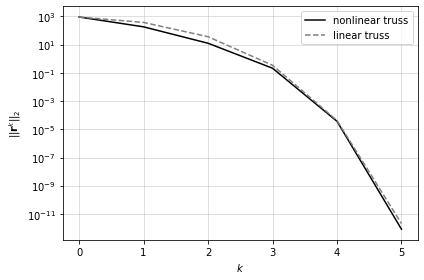

In [3]:
s_nl.plot_convergence(label_text="nonlinear truss")
s_l.plot_convergence(label_text="linear truss")
s_l.show_plot()
#s_l.save_plot_pdf(filename="convergence_plot")

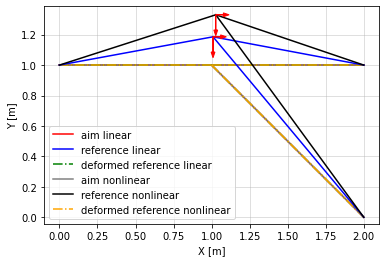

In [4]:
s_l.plot2d(["aim","ref","extra"],scale_force=0.05,scale_arrow=0.5,print_lvl=0,proj="z")
s_nl.plot2d(["aim","ref","extra"],scale_force=0.05,scale_arrow=0.5,print_lvl=0,proj="z")
s_l.show_plot()
#s_l.save_plot_pdf(filename="deformation_plot")

In [5]:
print(" >> found reference configuration")
print("linear: ",linear_nodes[1].x,linear_nodes[1].y,linear_nodes[1].z)
print("nonlinear: ",nonlinear_nodes[1].x,nonlinear_nodes[1].y,nonlinear_nodes[1].z)
print(" >> aim configuration")
print(n01.x1,n01.y1,n01.z1)

 >> found reference configuration
linear:  1.0093919774375746 1.1858502537476332 0.0
nonlinear:  1.0273412684167473 1.3304932012403103 0.0
 >> aim configuration
1.0 1.0 0.0
